# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return response_train, response_train_pred, response_test, response_test_pred

def generateConfusionMatrix(response, response_pred, title):
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

/var/folders/y1/6s6fsy6x44qdcc10mwlwldt80000gn/T/ipykernel_60291/2704071968.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.46594203]
Coefficients 	: a =  [[0.21946222]]
R^2 0.004684526266269806


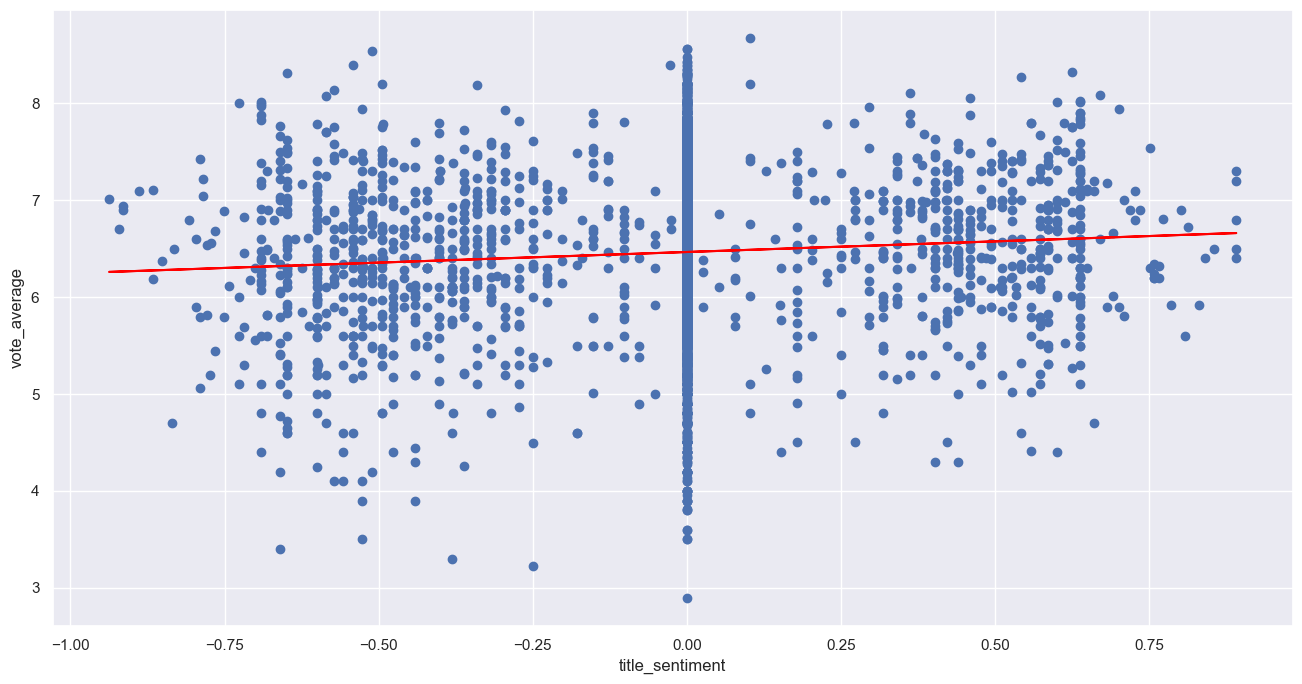

Intercept 	: b =  [6.46902]
Coefficients 	: a =  [[0.1019661]]
R^2 0.0064324905140737965


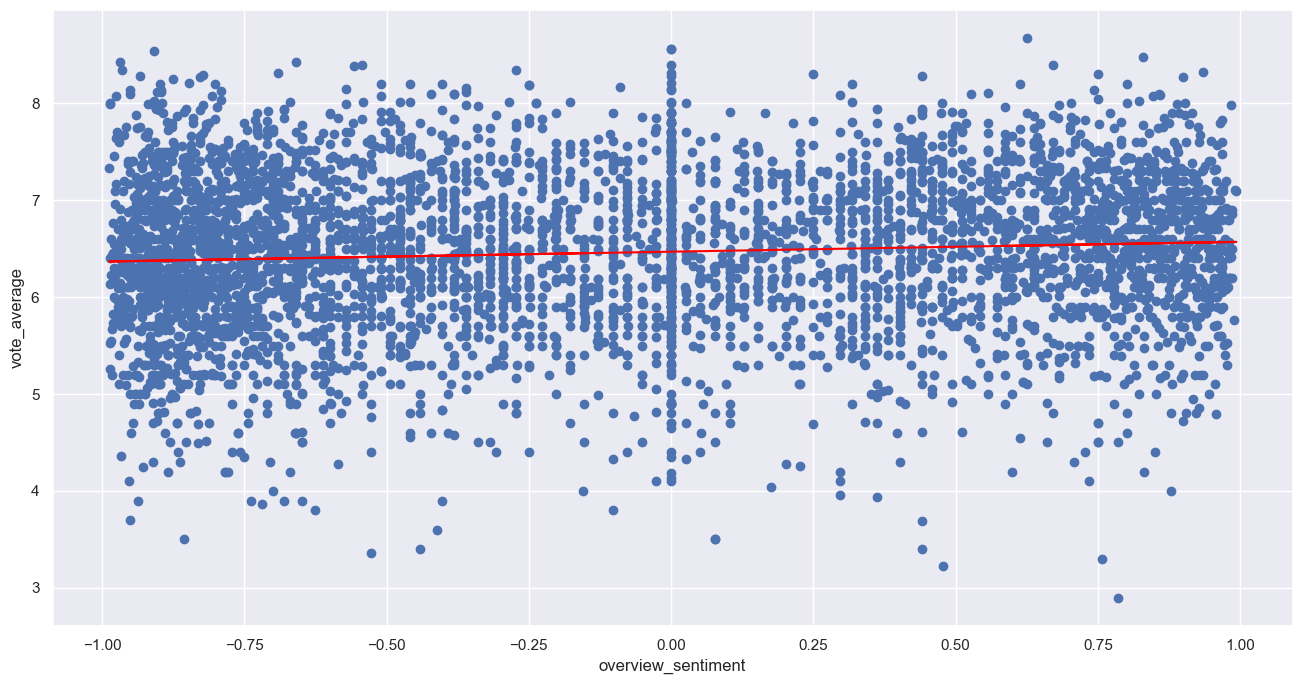

Intercept 	: b =  [6.4012947]
Coefficients 	: a =  [[0.00309817]]
R^2 0.001425801294025808


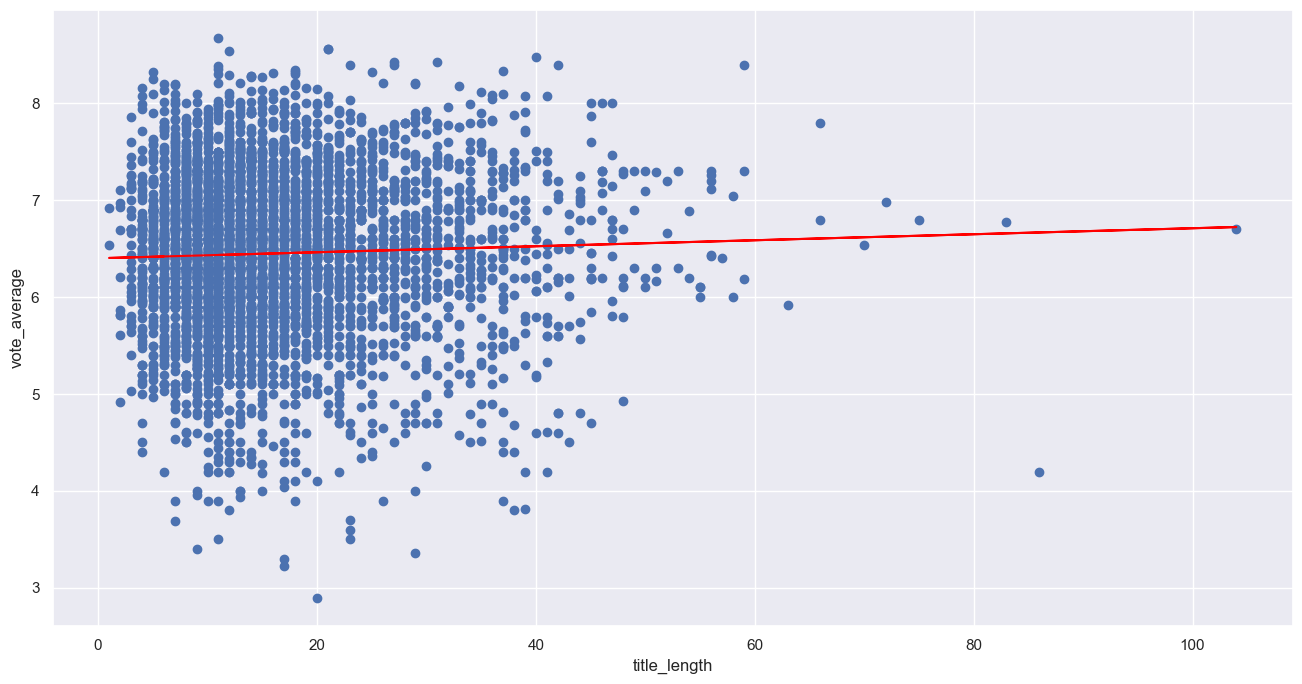

Intercept 	: b =  [6.39491577]
Coefficients 	: a =  [[0.01873738]]
R^2 0.0017818920533456684


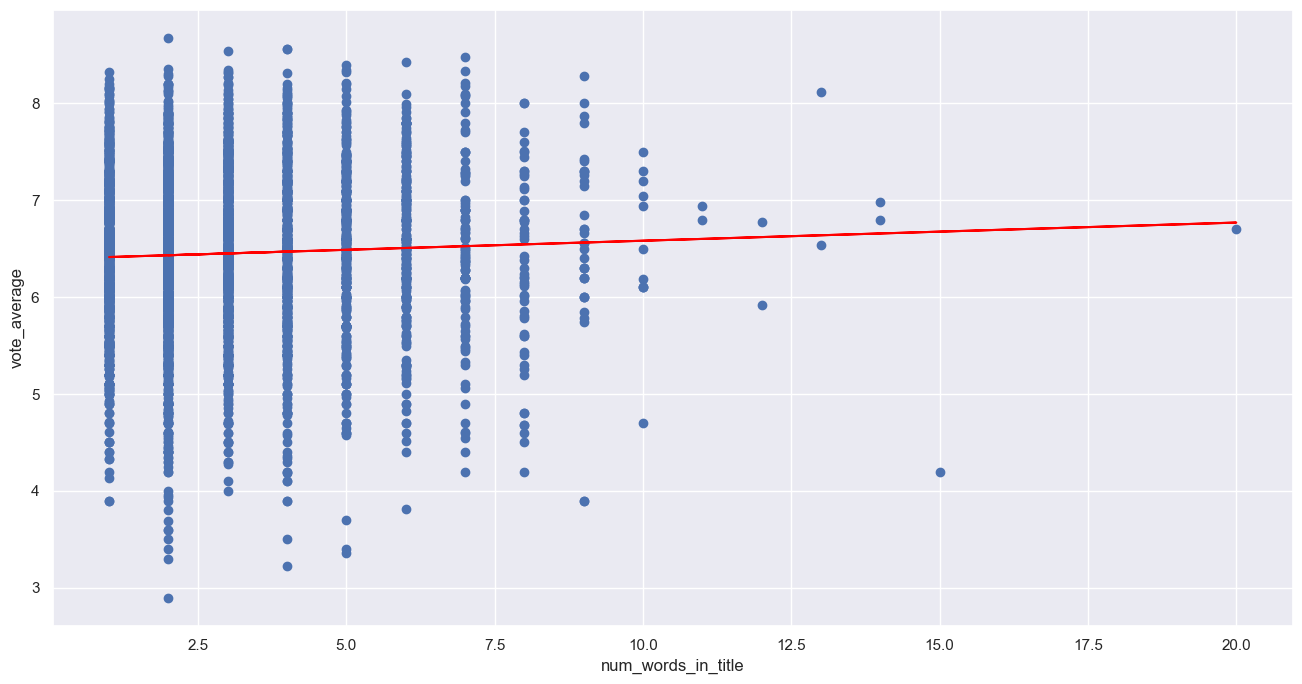

Intercept 	: b =  [6.49576017]
Coefficients 	: a =  [[-0.00668768]]
R^2 0.00024146133617863885


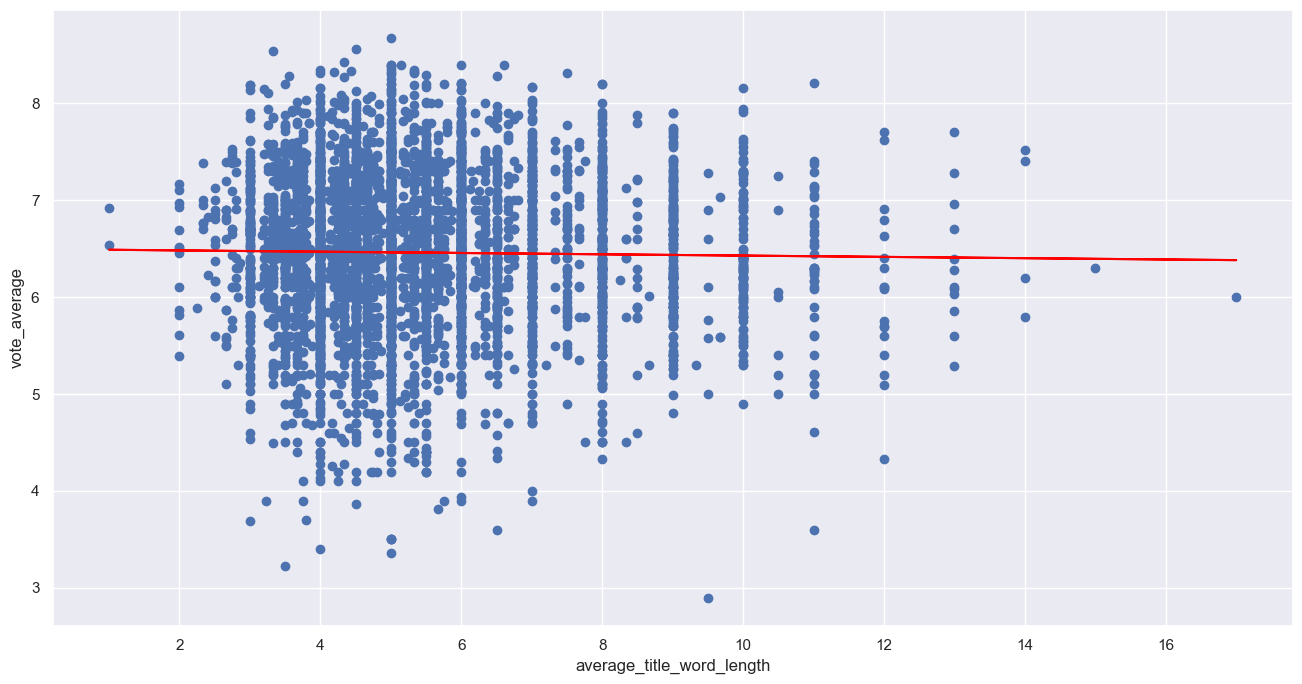

Intercept 	: b =  [6.43931486]
Coefficients 	: a =  [[0.08782234]]
R^2 0.0021459830851630057


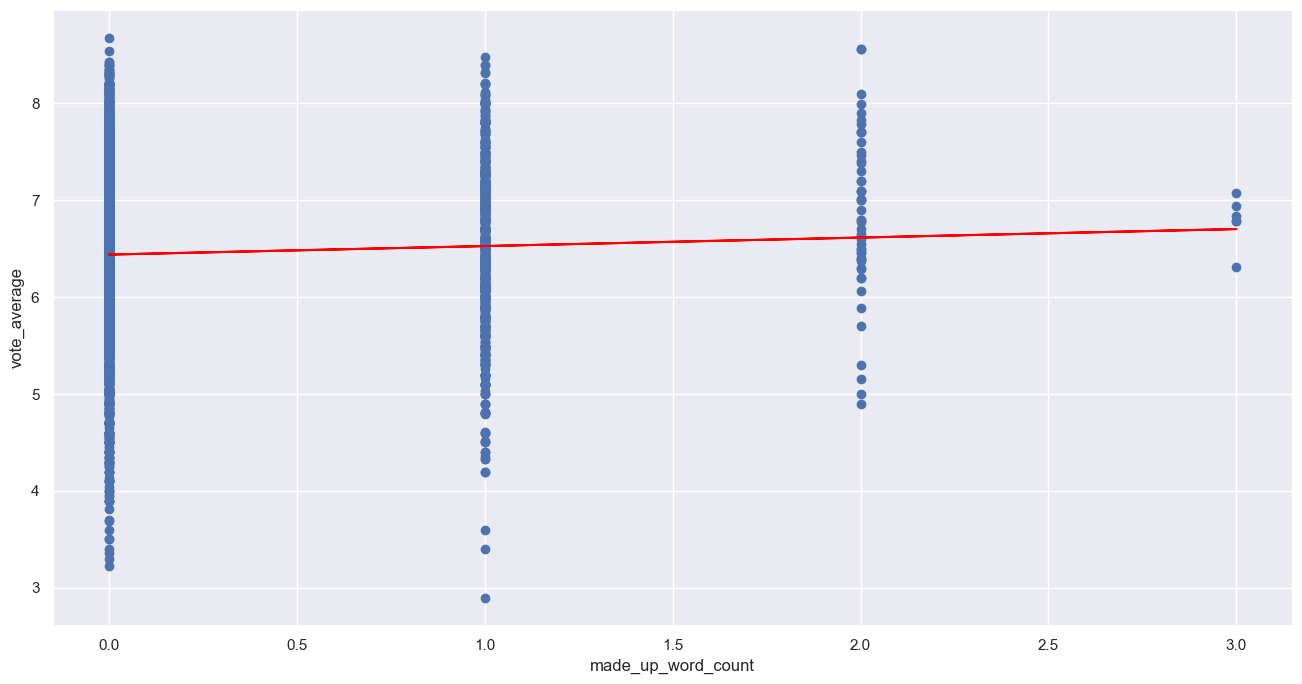

In [2]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [25.99648629]
Coefficients 	: a =  [[-1.28987883]]
R^2 0.0007150403046031206


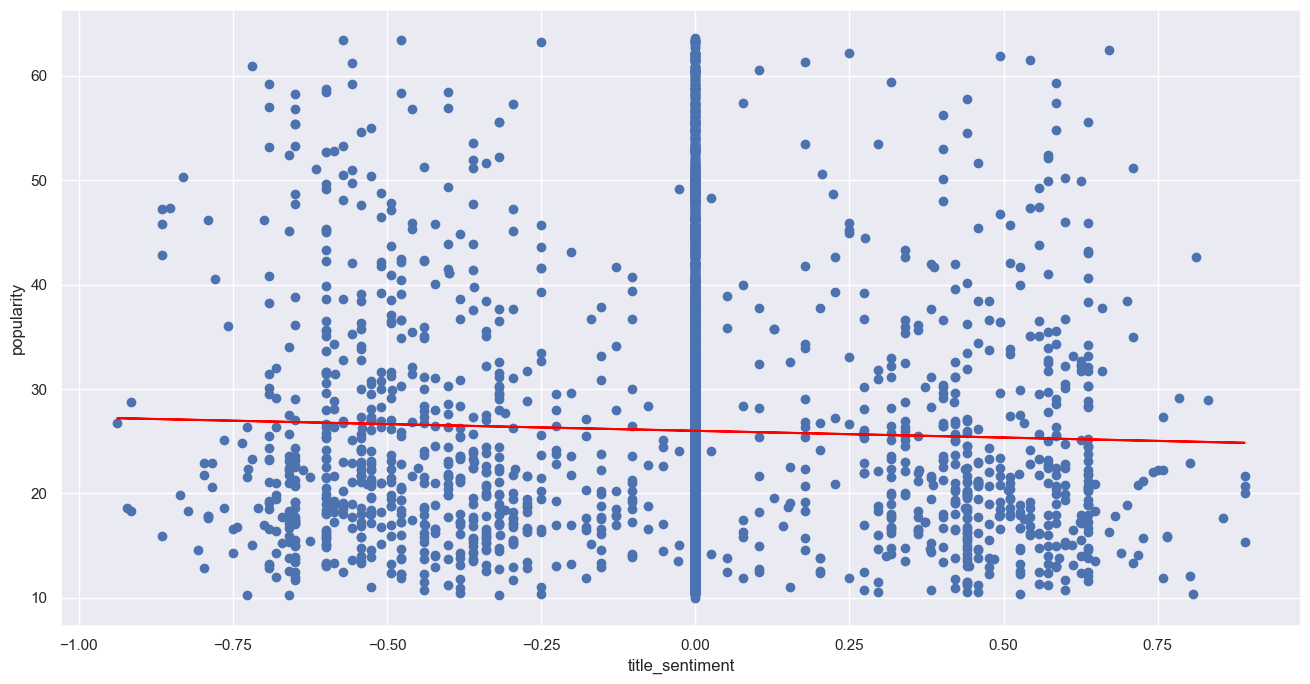

Intercept 	: b =  [25.86180947]
Coefficients 	: a =  [[-0.50082689]]
R^2 0.0007264970535438842


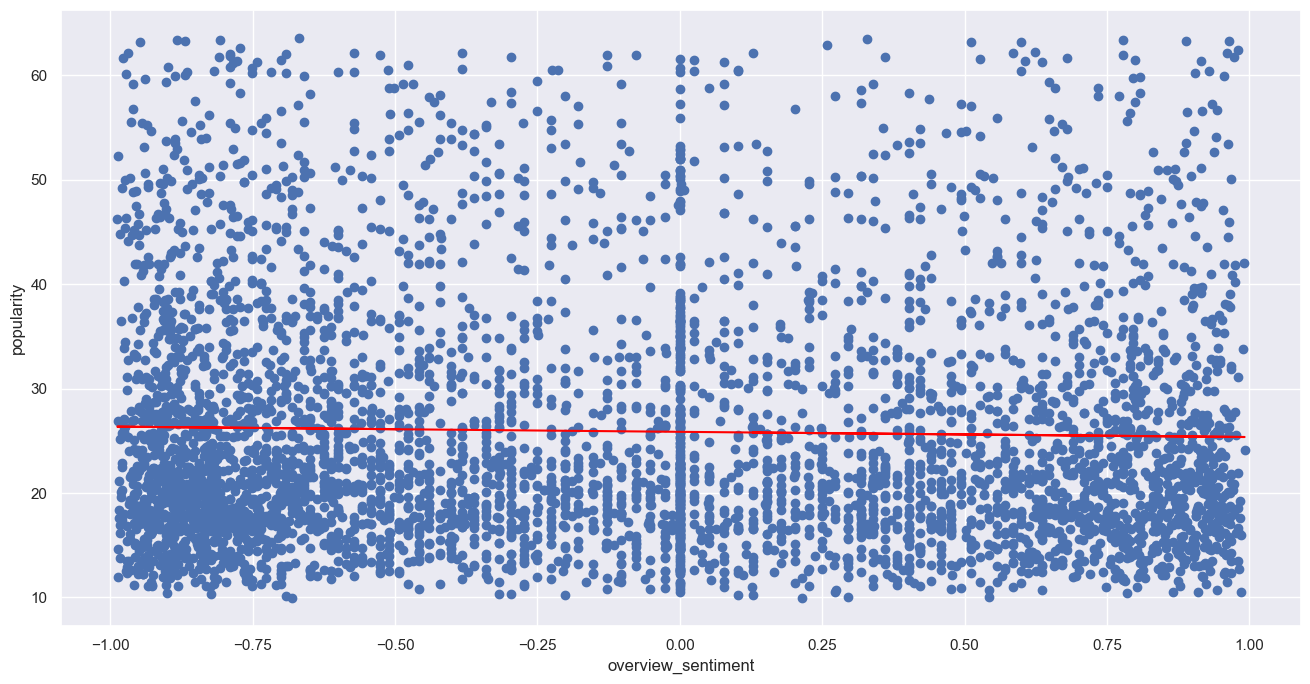

Intercept 	: b =  [25.8674809]
Coefficients 	: a =  [[0.00568667]]
R^2 2.1670851038102512e-05


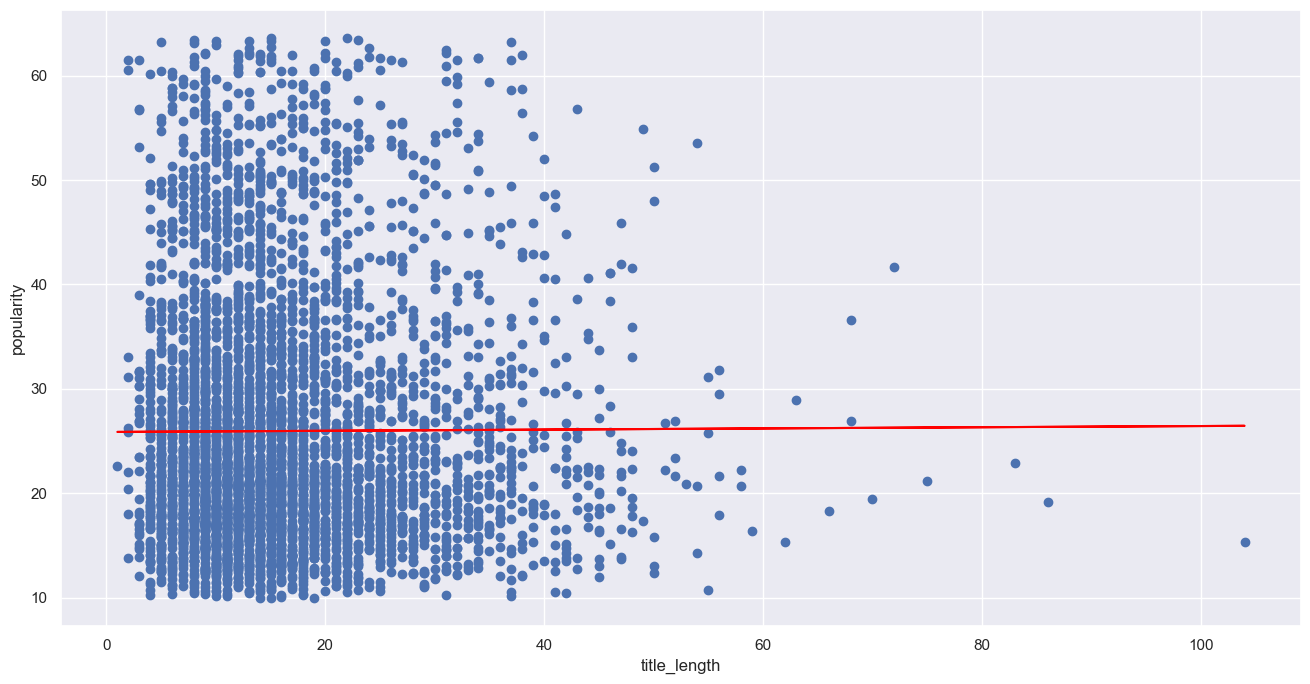

Intercept 	: b =  [26.0919701]
Coefficients 	: a =  [[-0.05549884]]
R^2 6.930007163141738e-05


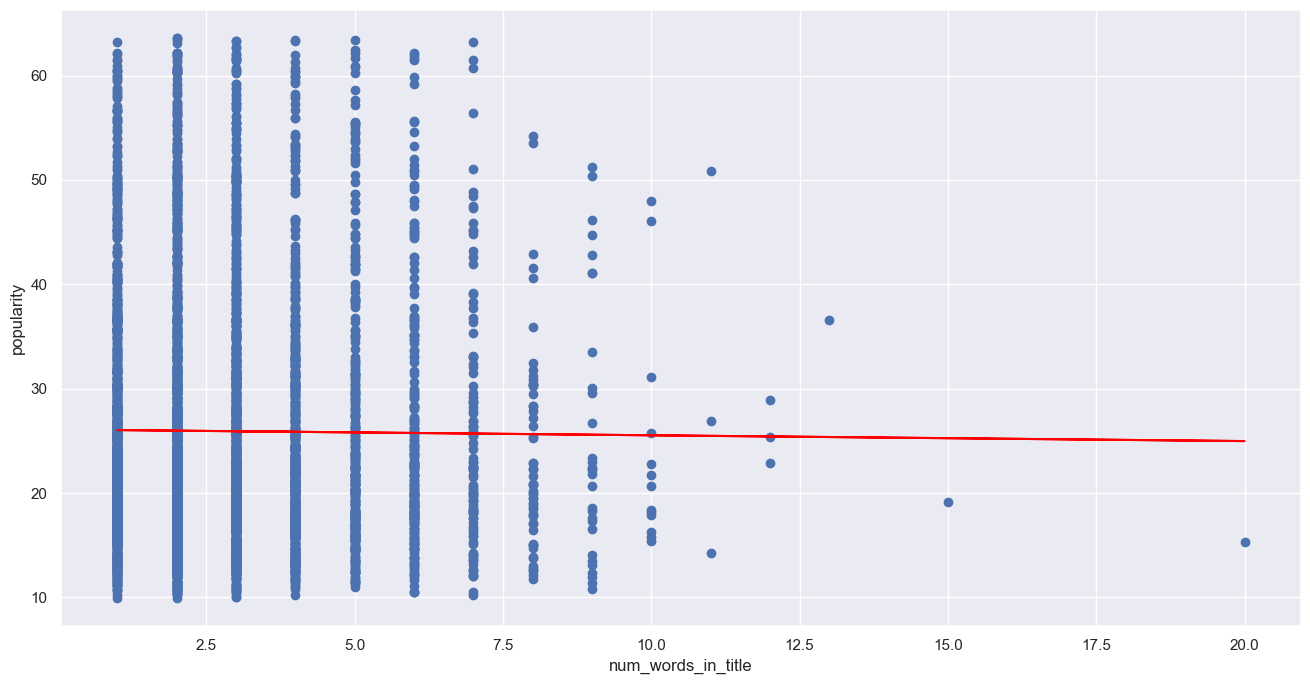

Intercept 	: b =  [25.18121805]
Coefficients 	: a =  [[0.16514348]]
R^2 0.0006382169829802775


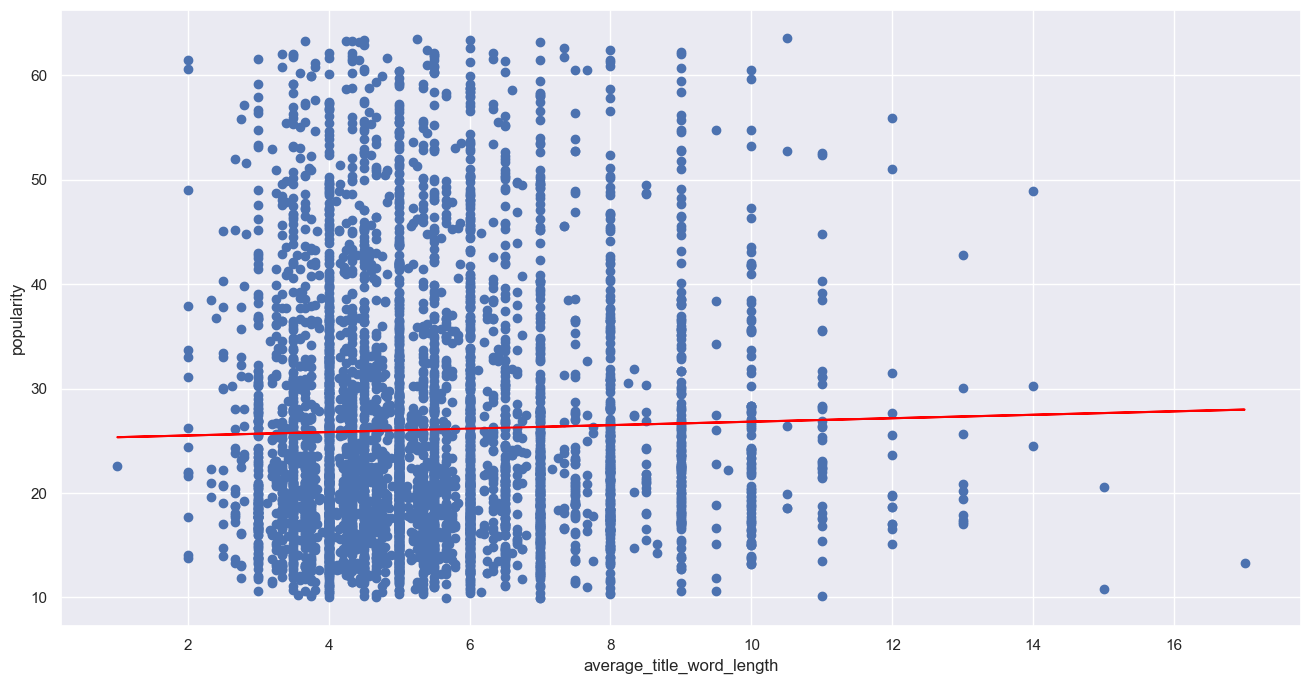

Intercept 	: b =  [25.79846344]
Coefficients 	: a =  [[0.29291163]]
R^2 0.00011358222995838663


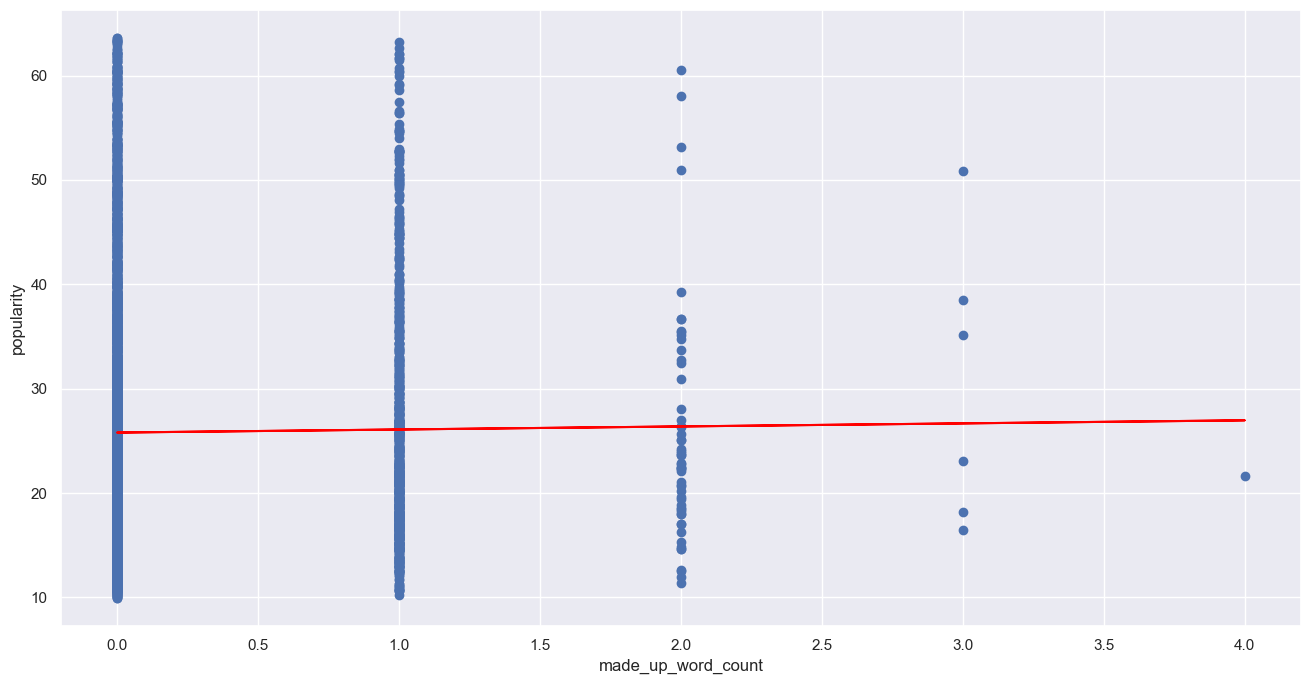

In [3]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

# Classification Tree

vote_average vs. has_made_up_word with depth 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8375
Test Classification Accuracy 	: 0.8340503995082975
True Positive Rate: 0.0225
False Positive Rate: 0.002696078431372549
True Negative Rate: 0.9973039215686275
False Negative Rate: 0.9775
True Positive Rate: 0.018518518518518517
False Positive Rate: 0.0036845983787767134
True Negative Rate: 0.9963154016212233
False Negative Rate: 0.9814814814814815


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


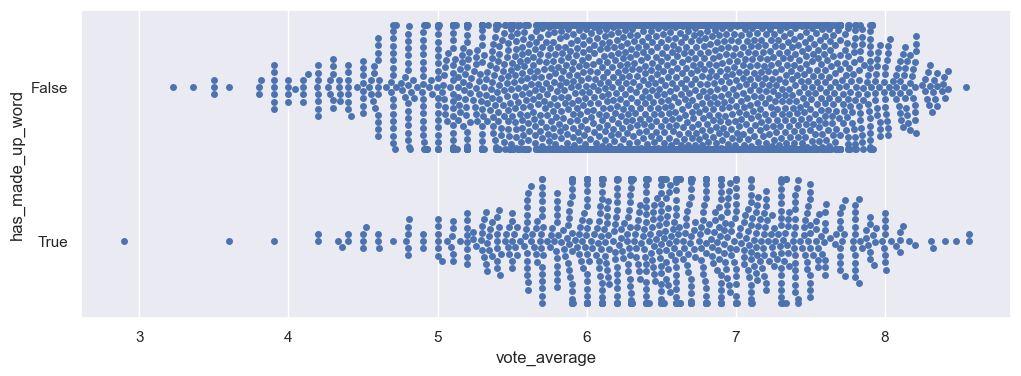

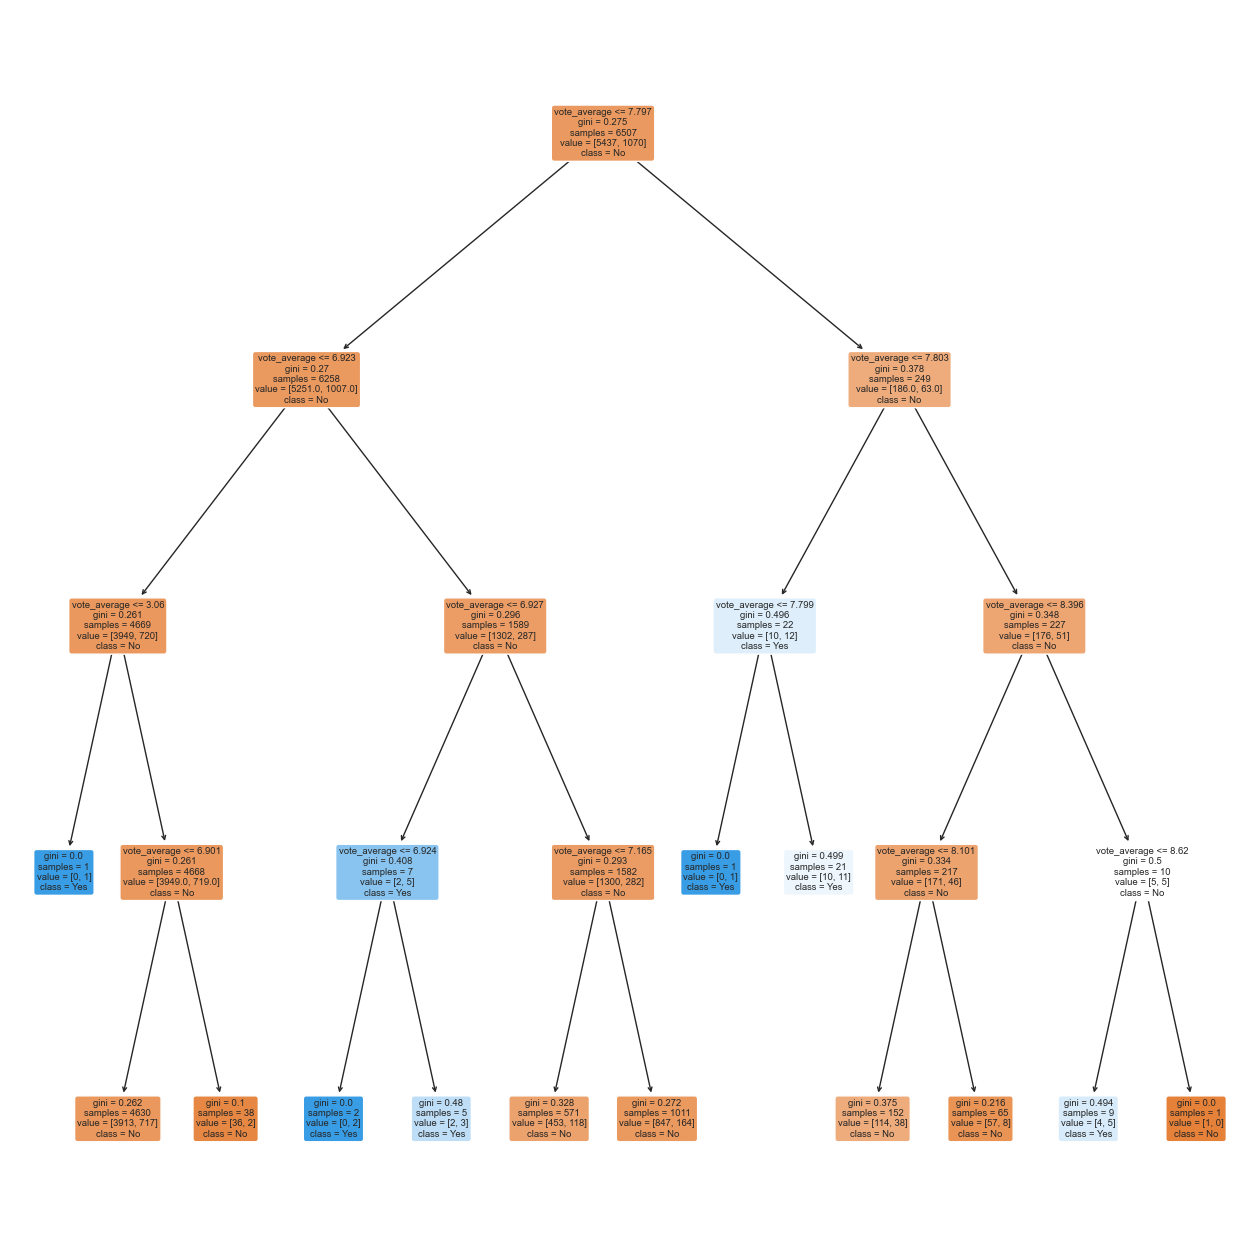

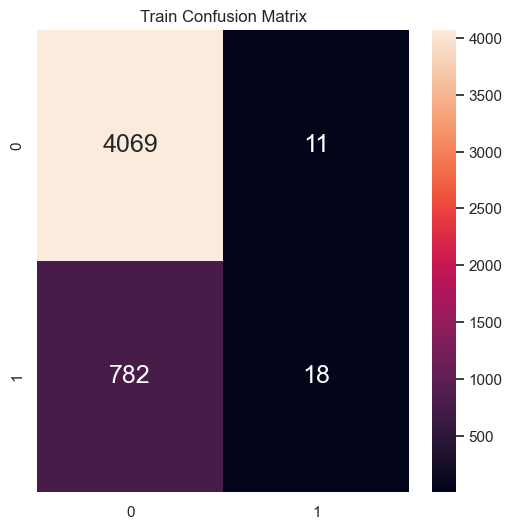

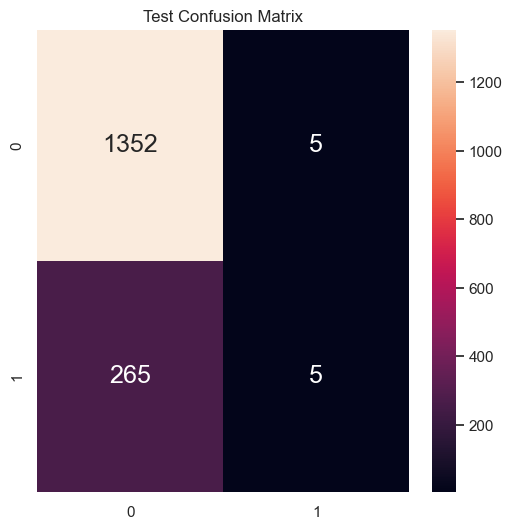

In [4]:
response_train_depth_4, response_train_pred_depth_4, response_test_depth_4, response_test_pred_depth_4 = generateClassificationTree(data,"vote_average",  "has_made_up_word",4 , ["No", "Yes"])
generateConfusionMatrix(response_train_depth_4, response_train_pred_depth_4, "Train Confusion Matrix")
generateConfusionMatrix(response_test_depth_4, response_test_pred_depth_4, "Test Confusion Matrix")